In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np

In [2]:
control = Table.read('./stat2/control_stat_6_23_all_data.fits')
jelly = Table.read('./stat2/stat_sfr_6_23_all_data.fits')
control_hb = Table.read('./stat/control_stat_5_7_hb.fits')


con_con = Table.read('./data/con.dat',format='ascii')
con1 = Table.read('./data/con1.dat',format='ascii')

area_mask = np.logical_and(control['NSA_ELPETRO_BA']>=0.3, np.logical_and(control['lead_area']>24, np.logical_and(control['trail_area']>24, control['pix_used_ratio']>0.8)))
control=control[area_mask]
# ba_mask = control['NSA_SERSIC_BA']>=0.4
# control=control[ba_mask]
# control_hb = control_hb[mask]

In [3]:
len(control['angle'])

547

(array([0.        , 0.06093845, 0.19500305, 0.75563681, 2.77879342,
        2.18159659, 0.511883  , 0.15843998, 0.02437538, 0.        ]),
 array([-0.75, -0.6 , -0.45, -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,
         0.6 ,  0.7 ]),
 <BarContainer object of 10 artists>)

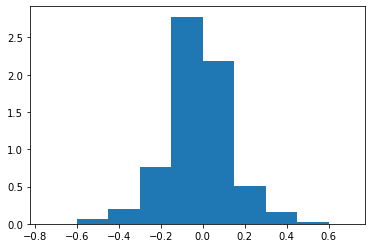

In [4]:
bins = [-0.75, -0.6, -0.45, -0.3, -.15, 0, 0.15, 0.3, 0.45, 0.6, 0.7]
plt.hist((control['lead_mean'] - control['trail_mean']) /
         (control['lead_mean'] + control['trail_mean']),
         bins=bins,
         density=True)

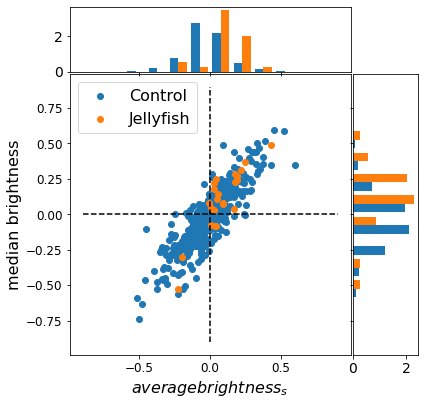

In [7]:
plt.rcParams['font.size'] = 16
# definitions for the axes
left, width = 0.15, 0.65
bottom, height = 0.15, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.15]
rect_histy = [left + width + spacing, bottom, 0.15, height]

# start with a square Figure
fig = plt.figure(figsize=(6,6))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = (jelly['lead_mean'] - jelly['trail_mean']) / (jelly['lead_mean'] + jelly['trail_mean'])
y = (jelly['lead_median'] - jelly['trail_median']) / (jelly['lead_median'] +
                                               jelly['trail_median'])
i = (control['lead_mean'] - control['trail_mean']) / (control['lead_mean'] +
                                             control['trail_mean'])
j = (control['lead_median'] - control['trail_median']) / (control['lead_median'] +
                                                   control['trail_median'])

ax.scatter(i, j, label='Control')
ax.scatter(x, y, label='Jellyfish')
ax.legend()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histx.tick_params(axis="y", labelsize=14)
ax_histy.tick_params(axis="x", labelsize=14)

ax.tick_params(labelsize=12)
ax.set_xlabel('average brightness')
ax.set_ylabel('median brightness')

ax_histx.hist([i, x], bins=bins, density=True)
ax_histy.hist([j, y], bins=bins, orientation='horizontal', density=True)
ax.vlines(0, -0.9, 0.9, colors="black", linestyles="dashed")
ax.hlines(0, -0.9, 0.9, colors="black", linestyles="dashed")

fig.savefig('scatter_manga.pdf')

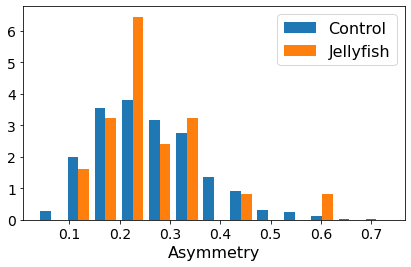

In [35]:
plt.hist([control['asymmetry'], jelly['asymmetry']],
         #cumulative=True,
         #histtype='step',
         bins=13,
         density=True,
         label=['Control', 'Jellyfish'])
ax = plt.gca()
ax.set_xlabel('Asymmetry')
ax.legend()
ax.tick_params(labelsize=14)

fig = plt.gcf()
plt.tight_layout()
fig.savefig('asy_hist_manga.pdf')

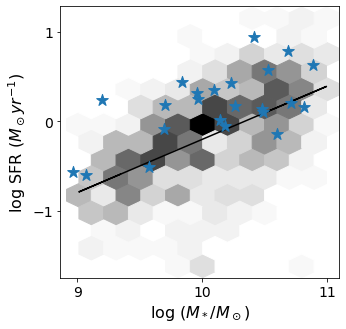

0.5936930887811733*M + -6.136940949777773


In [37]:
x = control['log_M']
y = np.log10(control['sfr'])

i = jelly['log_M']
j = np.log10(jelly['sfr'])

fig = plt.gcf()
fig.set_figwidth(5)
fig.set_figheight(5)

ax = plt.gca()
# plt.scatter(x,y)
hexb = ax.hexbin(x, y, gridsize=(10,7), cmap=plt.cm.Greys, edgecolors='face')
# fig.colorbar(hexb, ax=ax)
m,c = np.polyfit(x,y,1)
ax.plot(x, m*x + c, c='black')

ax.scatter(i,j,marker='*',s=150,zorder=100)

from matplotlib.pyplot import MultipleLocator
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

plt.rcParams['font.size'] = 16
ax.tick_params(labelsize=14)
ax.set_xlabel('log $(M_*/M_\odot)$')
ax.set_ylabel('log SFR $(M_\odot yr^{-1})$')

plt.show()

print(str(m)+'*M + '+str(c))

fig.savefig('sfr_manga.pdf')

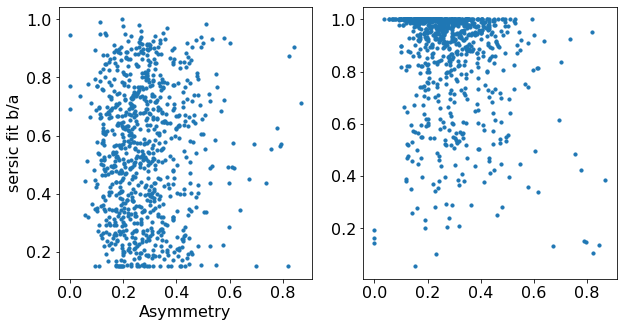

In [51]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(5)

axs[0].set_xlabel('Asymmetry')
axs[0].set_ylabel('sersic fit b/a')


axs[0].scatter(control['asy'],control['NSA_SERSIC_BA'],s=10)

axs[1].scatter(control['asy'],control['area_used']/control['area_re'],s=10)
